# CHM210 Assignment 1: Stratospheric Chemistry

Welcome to the first assignment for CHM210. We are going to use a <a href="https://jupyter4edu.github.io/jupyter-edu-book/">Jupyter notebook</a> with Python to investigate some properties of stratospheric chemistry and the ozone layer. All of your answers will be completed within this document (changes you make are saved into your personal https://utoronto.syzygy.ca account, so don't worry about editing this file). There are a lot of free, online resources out there to help you with Jupyter and Python. I recommend Christian Hill's <a href="https://scipython.com/book/">"Learning Scientific Programming with Python"</a>. The chemistry content of this assignment should follow your textbook and lecture notes, but for those wanting additional materials, Daniel Jacob's <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/">"Introduction to Atmospheric Chemistry"</a> is freely available online and has several relevant chapters for this assignment (Ch1. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap1.html#pgfId=518053">"Measures of Atmospheric Composition</a>, Ch2. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap2.html#pgfId=496461">"Atmospheric Pressure"</a>,  and Ch10. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap10.html#pgfId=46289">"Stratospheric Ozone"</a>).

We are going to look at some real satellite data related to the structure and composition of the stratosphere in order to better understand the chemistry that takes place. The below image is data from the Atmospheric Infrared Sounder, or AIRS, instrument from NASA's Earth Observing System (EOS) polar-orbiting platform. This data is freely available through NASA's EarthData portal, <a href="https://giovanni.gsfc.nasa.gov/giovanni/">GIOVANNI</a>. 
<img src="http://individual.utoronto.ca/sck/CHM210/GIOVANNI-output8IOXbvLT.png">
The above data is a daily averaged vertical profile of ozone over Toronto from September 23rd, 2016. We can see where the ozone "layer" is on this graph. But <i>why</i> does it form there?

First things first, we need to import the Python modules we will be using for this assignment. Press the "Run" button (or ctrl-enter) on the box below to import the packages we need. If done successfully, the "You have imported the above packages!" text will display below. 

## Importing Python modules and getting to know Python

In [1]:
# lines that start with a "#" character are comments (Python doesn't treat them as code, but they are helpful for including explanations of why we have written code a particular way)
# the import statements are how we add the specific packages we want to use
# when we write "import YYYYYY as Y", we are creating a shortform "Y" that we can use to reference the package "YYYYYY"  
import matplotlib.pyplot as plt
import math as m
import numpy as np
import os
# below is a simple print statement that will appear as text when we run this box of code
# you can easily change what text prints here by editing the words between the ""
print("You have imported the above modules!")

You have imported the above modules!


Let's practice some simple math before we get started to make sure you're comfortable using this Notebook. Run the code below (and feel free to change things) to see what simple arithmetic looks like in Python.

In [2]:
5+10

15

This is how you would write $10^5$

In [3]:
10**5

100000

There are several useful, pre-built, functions you can play with, like max(), min()

In [4]:
# max() returns the maximum value of all arguments you give it
max(1,3,6,10,5)

10

We can also easily write our own functions, as below:

In [5]:
# We are defining our own function called "mean" that will take in an "array" of numbers and return the mean
def mean(array): 
    # the sum function returns the sum of all values in our array
    # the len function returns the number of elements in our array 
    return sum(array) / len(array) 

Now let's use our new function

In [6]:
# this is just a test array (the name isn't meaningful nor the numbers we're starting with) 
testarray = [4,7,10,11,100]
# now we call our function with the testarray as the input
mean(testarray)

26.4

Now let's look what that math package we imported allows us to do. 

In [7]:
# the default logarithm is the natural log (ie. base e)
m.log(10)

2.302585092994046

In [8]:
# this is how you call log base 10 (math.log(a,base))
m.log(10,10)
# alternatively, you can use math.log10(a)

1.0

The math module contains most of the basic mathematical functions we might want, ie. sqrt(x), exp(x), sin(x), pi, e, etc. You can look them up <a href="https://docs.python.org/3/library/math.html">here</a> and test them out below:

In [9]:
m.sqrt(100)
#m.pi
#m.exp(1)

10.0

## Let's load some real data

Let's start by looking at the observed temperature profile.

First, we need to download the data into our notebook. We will do so with the loadtxt function as below. Run the code below this text box. When you run the code, the text stating "You have loaded the pressure and temperature data!" will print (and hopefully no error messages along with it).

In [10]:
# download .txt file containing atmospheric pressure in units of hPa
Pressure = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/Pressure.txt")
# download .txt file containing atmospheric temperature in units of Kelvin
Temperature = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/Temperature.txt")
print("You have loaded the pressure and temperature data!")

You have loaded the pressure and temperature data!


## Learning to plot simple data
Now, let's plot the data to see what it looks like. The code below will create a simple plot of the data we have just imported. If the below code works properly, you should see a plot with pressure on the y-axis and temperature on the x-axis.

(210, 320)

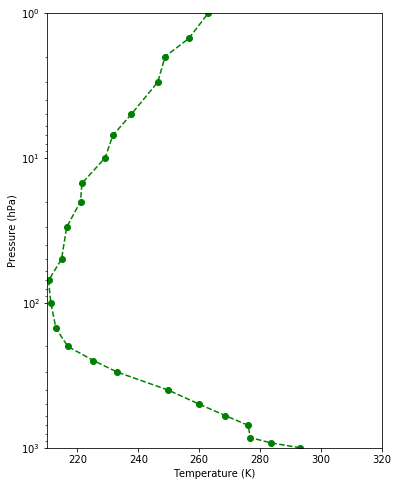

In [11]:
# this makes the plot (and sets the size as 6"x8")
fig = plt.figure(figsize=(6, 8))
tp = fig.add_subplot(111)

# this tells Python what data to plot (Temperature vs Pressure) and what markers to use (go-- means green dashes between solid circles)
tp.plot(Temperature, Pressure, 'go--')
# we label the axis (with units!)
tp.set_ylabel('Pressure (hPa)')
tp.set_xlabel('Temperature (K)')
# we will set the y-axis to be on a log-scale since we are plotting pressure
tp.set_yscale('log')
# we will set the axis limits just to make things look a little nicer
tp.set_ylim((1000, 1))
tp.set_xlim((210, 320))

Now for the first question. We will walk through the first one together.

# Q1a. Identify the height at which the tropopause occurs (you must include units with your answer!) <i>(2 marks)</i>

To do this, we will need to convert pressure (hPa) to altitude (km). We can do that by knowing that,

\begin{align}
z = -log\bigg(\frac{P(z)}{P(0)}\bigg)\times \frac{(R\times T)}{(M_{air}\times g)}
\end{align}

Where $P(z)$ is the pressure at altitude z, $P(0)$ is the pressure at the surface, $R$ is the gas constant, $T$ is the temperature, $M_{air}$ is the molecular weight of air, and $g$ is the acceleration due to gravity. A straightforward derivation of this can be found in <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap2.html#pgfId=438989"> Jacob</a>.
We can write this equation in Python as below:

In [12]:
# First, let us assign values to the variables we need to use. 
# When working with R, the gas constant, pay close attention to its units.
R = 8.31 # m3⋅Pa⋅K−1⋅mol−1
Ma = 29 #g mol-1.
g = 9.8 #m s-2

# We are going to calculate the altitude corresponding to each pressure value.
# What the below code says is that for each level z, starting with the first pressure value (0) and ending with the last (len(Pressure)), we will calculate the corresponding altitude
# for z in range(0,len(Pressure)):
Altitude = [-m.log(Pressure[z]/Pressure[0])*(R*Temperature[z])/(Ma*g) for z in range(0,len(Pressure))]

# This will print out the contents of our array so we can make sure they make sense (values should range between 0km and ~53km)
print(Altitude)

[-0.0, 0.6463918956236044, 1.3151452214061055, 2.8796906991746334, 4.011800255564502, 5.269155486326363, 6.693743805188915, 8.202566021890949, 9.130065147624338, 10.205141142150634, 11.811757392142377, 14.222340082851833, 16.3668965290799, 18.811912030935336, 22.19466832623713, 25.281169035889185, 27.193723822474034, 30.84685886963993, 33.60417303182404, 36.82317752744588, 41.8523161562467, 45.20630417570779, 48.78358518373318, 53.12719258775497]


If the above code worked, you should have printed the altitudes calculated ranging from 0km to 53km. Let's replot our temperature vs pressure graph to show temperature vs altitude. 

Fill-in the correct information in the below code (ie. replace "FILL_IN_CORRECT_NAME" with "Altitude"):

Text(0.5, 0, 'Temperature (K)')

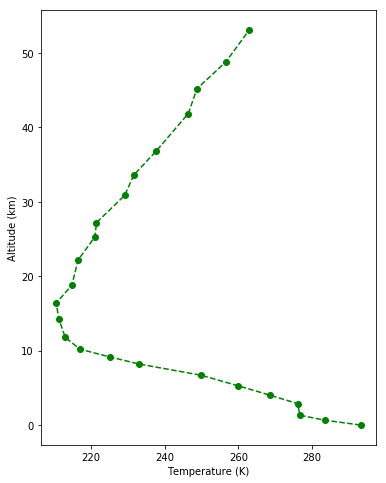

In [13]:
fig = plt.figure(figsize=(6, 8))
tp = fig.add_subplot(111)

tp.plot(Temperature, Altitude, 'go--')
tp.set_ylabel('Altitude (km)')
tp.set_xlabel('Temperature (K)')

Now you should be able to identify the height at which the tropopause occurs by reading it off the graph (plus or minus 5km is fine). 

# Answer to Q1a :
***

If we define the tropopause as the region where the vertical temperature gradient changes signs, then we can see that it occured roughly between <b>10-15km</b> over Toronto on September 23rd, 2016.

***
# Q1b: Is this height constant (ie. would we expect to find the tropopause at the same altitude over different parts of the world or at times of year)? Why or why not?  <i>(2 marks)</i>

# Answer to Q1b:
***

<b>No</b>, the height of the tropopause varies with latitude and season. To see what this variability actually looks like, check out this figure modified from Zhang et al. (<a href="https://ieeexplore.ieee.org/document/6522167">IEEE Transactions on Geoscience and Remote Sensing</a>, 2014) showing the monthly weighted averages of the global tropopause height over a few different latitude regions.

<img src="http://individual.utoronto.ca/sck/CHM210/tropopauseheightb.png" alt="Image from ZHANG et al. showing monthly weighted averages of the global tropopause height from 2007 to 2011 - variability of 5-10km can be seen in tropopause height depending on latitude and time of year">

We can see significant variability, and this is because the <b>temperature gradient (or lapse rate) is determined by several meteorological factors</b> that are location and time of day and day of year specific. Even large storm systems can shift the height of the tropopause. Major latitudinal differences are driven by general circulation patterns (strong convection of warm, moisture rich air at the equator cause the tropopause to be significantly higher at the equator than the poles, where little upward convection occurs).

***
# Q2a. Plot Altitude (km) vs Number Density (molecules/$cm^3$) <i>(2 marks)</i>  

All axis must be labelled with correct units.

To do this, you will need to remember the ideal gas law,
\begin{align}
PV=nRT
\end{align}
Where $P$, $R$, $T$ are as defined above, and $n$ is the number of moles of air contained in $V$ volume of atmosphere. You will likely need Avogadro's number to convert between molecules and moles.

In [14]:
Av = 6.023e23 # molecules mol-1 is Avogadro's number

Write an expression to solve for the number density ($N_a$). Check your notes or look at <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap1.html#pgfId=521385"> Jacob</a> for a refresher if you are stuck. Look at how we wrote the expression for Altitude above to figure out how to write this piece of code. Remember to pay close attention to units! 

In [15]:
Na = [(Av*100*Pressure[z])/(R*Temperature[z])/(100**3)  for z in range(0,len(Altitude))]

Once you've calculated number density, create your plot.

# Answer to Q2a:
***

Text(0.5, 0, 'Number Density (molecules/$cm^3$)')

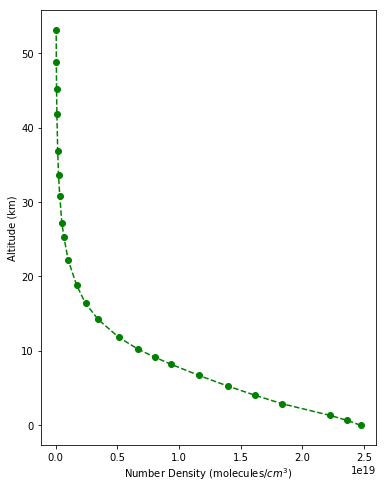

In [16]:
fig3 = plt.figure(figsize=(6, 8))
na = fig3.add_subplot(111)

na.plot(Na, Altitude, 'go--')
na.set_ylabel('Altitude (km)')
na.set_xlabel('Number Density (molecules/$cm^3$)')

***
# Q2b. Plot Altitude vs $O_2$ (molecules/$cm^3$) <i>(2 marks)</i>
All axis must be labelled with correct units.

# Answer to Q2b:
***

Text(0.5, 0, '[$O_2$] (molecules/$cm^3$)S')

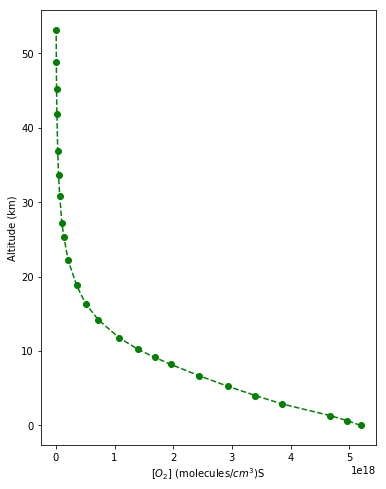

In [17]:
# Rememeber what percentage of the atmosphere is O2
O2 = [0.21*Na[z] for z in range(0,len(Altitude))]

fig4 = plt.figure(figsize=(6, 8))
O2a = fig4.add_subplot(111)
O2a.plot(O2, Altitude, 'go--')
O2a.set_ylabel('Altitude (km)')
O2a.set_xlabel('[$O_2$] (molecules/$cm^3$)S')

***
# The Chapman Mechanism 

Recall from lecture the four reactions originally proposed to explain the presence of the stratospheric ozone layer,

\begin{align}
O_{2} + h\nu & \rightarrow O + O^{*} & (\lambda<240nm) &&(R1) \\
O + O_{2} + M & \rightarrow O_{3} + M &  &&(R2) \\
O_{3} + h\nu&  \rightarrow O_{2} + O^{*} & (\lambda<320nm) &&(R3) \\
O_{3} + O& \rightarrow 2O_{2} &  &&(R4)
\end{align}

# Q3a. Write down the rates of each of the above four reactions  <i>(2 marks)</i>
The rate constants are $k_1$ for $R1$, $k_2$ for $R2$, $k_3$ for $R3$, and $k_4$ for $R4$. $k_{1}$ and $k_{3}$ have units of $s^{-1}$ (photon density is already incorporated), $k_{2}$ in units of $cm^{6}molecules^{-2}s^{-1}$, and $k_{4}$ in units of $cm^{3}molecules^{-1}s^{-1}$. The rates of reactions will be written as functions of the rate constants and concentrations ($[O_{2}]$, $[M]$, $[O_{3}]$, and $[O]$).

# Answer to Q3a:
***

\begin{align}
rate_1 & = k_1[O_2] \\
rate_2 & = k_2[O][O_2][M] \\
rate_3 & = k_3[O_3] \\
rate_4 & = k_4[O_3][O] \\
\end{align}


***
# Q3b. Plot the rate constants vs altitude <i>(4 marks)</i>
To do this, we will need to import data for k1 and k3. The data we will be using is output from the <a href="http://cprm.acom.ucar.edu/Models/TUV/Interactive_TUV/">TUV calculator</a>, a free, online tool for modelling photolysis frequencies and actinic flux.

In [18]:
# download a .txt file containing photolysis rate constants for O2 -> O + O from 0 - 50km~
k1 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/k1d.txt")
# download a .txt file containing photolysis rate constants for O3 -> O2 + O(1D) from 0 - 50km~
k3 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/k3d.txt")
print("k1 and k3 have been loaded!")

k1 and k3 have been loaded!


The expression for $k_2$ is given by,

$k_{2} = 6\times10^{-34}(T/300)^{-2.3}$ 

You will need to write this in a form Python can interpret.

In [19]:
k2 = [6e-34*(Temperature[z]/300)**-2.3 for z in range(0,len(Pressure))]

Similarly, $k_{4}$ is given by,

$k_{4} = 8\times10^{-12}exp(-2060/T)$ 

In [20]:
k4 = [8e-12*m.exp(-2060/Temperature[z]) for z in range(0,len(Pressure))]

Now we should have everything needed to plot the four rate constants. If you have kept the names as above, the below code should plot the four rate constants vs altitude.

# Answer to Q3b:
***

(0, 7.444429003391403e-15)

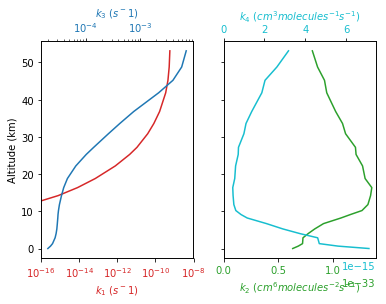

In [21]:
# we are going to make two plots so k1 and k3 are on one plot and k2 and k4 are on another
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# k1 will be in red
color = 'tab:red'
ax1.set_xlabel('$k_1$ ($s^-1$)', color=color)
# the x-axis will be in a log-scale so we can see how many orders of magnitude our rate constants span
ax1.set_xscale('log')
ax1.set_ylabel('Altitude (km)')
ax1.plot(k1, Altitude, color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_xlim((1e-16, None))

ax3 = ax1.twiny()
# k3 will be in blue
color = 'tab:blue'
ax3.set_xlabel('$k_3$ ($s^-1$)', color=color)
ax3.set_xscale('log')
ax3.plot(k3, Altitude, color=color)
ax3.tick_params(axis='x', labelcolor=color)

# k2 will be in green
color = 'tab:green'
ax2.set_xlabel('$k_2$ ($cm^{6}molecules^{-2}s^{-1}$)', color=color)
ax2.plot(k2, Altitude, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim((0, None))

ax4 = ax2.twiny()
# k4 will be in cyan
color = 'tab:cyan'
ax4.set_xlabel('$k_4$ ($cm^{3}molecules^{-1}s^{-1}$)', color=color) 
ax4.plot(k4, Altitude, color=color)
ax4.tick_params(axis='x', labelcolor=color)
ax4.set_xlim((0, None))

***
# Q3c. What is the steady-state assumption and when might it apply to chemical species in the atmosphere <i>(2 marks)</i>

# Answer to Q3c:

***


The steady-state assumption for a chemical species is that <b>sources and sinks are equal</b> (this results in the <b>net rate of change in concentration being 0</b>, ie. $\frac{d[C]}{dt} = 0$). Even in cases when this is not exactly true, we can assume that a species is in quasi-steady-state when the =production rate and chemical lifetime, $\tau$, have remained roughly constant for a period of time much greater than $\tau$ (ie. <b>production and loss rates don't change very much over a species' chemical lifetime</b>). In a quasi-steady-state, $\frac{d[C]}{dt}$ is very small compared to production and loss rates. 

This is <b>not synonymous with chemical equilibrium</b>. Species in a chemical equilibrium are in steady-state, but steady-state does not mean an equilibrium has or will be reached. A chemical equilibrium forms in a closed, isolated system (constant entropy) when forward and reverse reaction rates are constant and equal and concentrations do not change over time (no “tendency” for the reaction to proceed forward or backwards). Consider the simple example: 

$A \rightarrow B$, with rate constant $k_f$, and 

$B \rightarrow A$, with rate constant $k_r$. 

At chemical equilibrium, $k_f[A] = k_r[B]$ and $[A]$ and $[B]$ are not changing (so $A$ and $B$ are in steady-state, but the system is entirely static - nothing is changing at all). 

In a chemical steady-state, $sources \rightarrow C \rightarrow sinks$, $sources = sinks$, but there is still a net reaction. While the $[C]$ is not changing, the system is still dynamic and entropy is still increasing.

Page 30-31 in the 5th edition of your textbook has an introduction to steady-state analysis.


***
# Q3d. Write an expression for the steady-state concentration of $O_3$ as a function of the rate constants and $[O_2]$ only. <i>(4 marks)</i>

# Answer to Q3d:

***

If we want the steady-state concentration of ozone, we are going to want an expression in terms of quantities that we can otherwise simply measure or model. We have a way of predicting rate constants that is fairy simple and a way of determining the concentration of $O_2$ in the atmosphere, but $O$ is a very challenging species to measure (and model) so we are going to want an expression for ozone that doesn't require us to already know $O$ (it's much easier to measure ozone than it is to measure atomic oxygen).
***
As a reminder,
\begin{align}
rate_1 & = k_1[O_2] \\
rate_2 & = k_2[O][O_2][M] \\
rate_3 & = k_3[O_3] \\
rate_4 & = k_4[O_3][O] \\
\end{align}

We're going to follow the convention used in your text book for notation here. We will start by writing down the rate of change of $[O]$,
\begin{align}
\frac{d[O]}{dt} & = 2rate_1 - rate_2 + rate_3 - rate_4
\end{align}
Atomic oxygen has a chemical lifetime of seconds (or less) and its production and loss rates depend on meteorological  variables and ozone concentration, which don't change that fast, so it is a good candidate for the steady-state assumption. Assuming a chemical steady-state for $[O]$ gives us,
\begin{align}
\frac{d[O]}{dt} & = 2rate_1 - rate_2 + rate_3 - rate_4 \\
 & = 0
\end{align}
We also know that $rate_2$ and $rate_3$ are much faster than $rate_1$ and $rate_4$ (this is known experimentally and was discussed in lecture as well as your text book), so the steady-state of atomic oxygen is going to be predominately controlled by $rate_2$ and $rate_3$. This lets us approximate $\frac{d[O]}{dt}$ to simplify things,
\begin{align}
\frac{d[O]}{dt} & ≈ -rate_2 + rate_3 \\
 & =  -k_2[O][O_2][M] + k_3[O_3] \\
 & = 0
\end{align}

Now if we think about odd-oxygen, $O_x=O_3 + O$, if we apply the steady-state assumption to the entire family,
\begin{align}
\frac{d[O_x]}{dt} & = 2rate_1 - 2rate_4 \\ 
& = 2k_1[O_2] - 2k_4[O_3][O] \\ 
 & = 0
 \end{align}
We can rearrange this to give us a simple expression for $[O]$
\begin{align}
[O] & = \frac{k_1[O_2]}{k_4[O_3]} \\
 \end{align}
 Now we can go back to $\frac{d[O]}{dt}$ and sub-in our expression for $[O]$,
\begin{align}
\frac{d[O]}{dt} & ≈ -k_2[O][O_2][M] + k_3[O_3] \\ 
 0 & =  -k_2\frac{k_1[O_2]}{k_4[O_3]}[O_2][M] + k_3[O_3] \\
  0 & =  \frac{-k_1k_2[O_2]^2[M]}{k_4[O_3]} + k_3[O_3] \\
 [O_3]^2 & = \frac{k_1k_2}{k_3k_4}[O_2]^2[M]
 \end{align}
If we want to remove $[M]$ from our expression, we can remember that $[O_2] = 0.21[M]$,
 \begin{align}
 [O_3] & = \sqrt{\frac{k_1k_2}{0.21k_3k_4}[O_2]^3}
 \end{align}

***
# Q3e. Plot the the steady-state concentration of $O_3$ vs altitude <i>(2 marks)</i>

# Answer to Q3e:
***

Text(0.5, 0, '[$O_3$] (molecules/$cm^3$)')

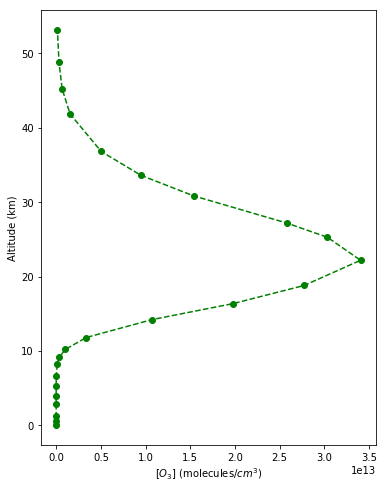

In [22]:
# You will need to convert your expression for the steady-state concentration of ozone into a form Python can recognize
O3 = [m.sqrt((k1[z]*k2[z]*(O2[z]**2)*(O2[z]/.21))/(k3[z]*k4[z])) for z in range(0,len(Pressure))]

fig5 = plt.figure(figsize=(6, 8))
O3a = fig5.add_subplot(111)

O3a.plot(O3, Altitude, 'go--')
O3a.set_ylabel('Altitude (km)')
O3a.set_xlabel('[$O_3$] (molecules/$cm^3$)')

***
# Q3f. By referencing the above plots you have made, explain why the ozone layer forms where it does. <i>(3 marks)</i>

# Answer to Q3f.
***


The ozone layer, as predicted by the Chapman mechanism, forms between 20-30km because it's where <b>production of ozone/$O_x$ is maximized</b>. Recall,
\begin{align}
O_{2} + h\nu & \rightarrow O + O^{*} & (\lambda<240nm) &&(R1) \\
O + O_{2} + M & \rightarrow O_{3} + M &  &&(R2) \\
\end{align}

Look at $rate_1$. We know that $O_x$ production is dependent on $k_1[O_2]$. We know that <b>$[O_2]$ decreases exponentially with altitude</b> (barometric law) while <b>$k_1$ increases shaply with altitude</b> ($k_1$ decreases as you go down in the atmosphere because $O_2$ and $O_3$ above absorb UV-C photons).  We can see this in the replotted figures below:


(0, 35738178759026.305)

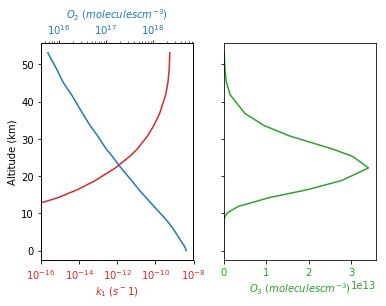

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# k1 will be in red
color = 'tab:red'
ax1.set_xlabel('$k_1$ ($s^-1$)', color=color)
# the x-axis will be in a log-scale so we can see how many orders of magnitude our rate constants span
ax1.set_xscale('log')
ax1.set_ylabel('Altitude (km)')
ax1.plot(k1, Altitude, color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_xlim((1e-16, None))

ax3 = ax1.twiny()
# O2 will be in blue
color = 'tab:blue'
ax3.set_xlabel('$O_2$ ($molecules cm^{-3}$)', color=color)
ax3.set_xscale('log')
ax3.plot(O2, Altitude, color=color)
ax3.tick_params(axis='x', labelcolor=color)


# O3 will be in green
color = 'tab:green'
ax2.set_xlabel('$O_3$ ($molecules cm^{-3}$)', color=color) 
ax2.plot(O3, Altitude, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim((0, None))


Similarly, $[M]$ decreases exponentially with altitude (see figure from Q2a)  while $k_2$ peaks in the lower stratosphere (see figure from Q3b), so the shape of the ozone curve with altitude is fine-tuned a little bit more. 

***
# Q4a. Plot our steady-state $[O_3]$ vs altitude on the same graph as the satellite observations above in units of ppbv. <i>(3 marks)</i>
We need to convert our data from $molecules/cm^3$ to ppbv. We will also have to download the ozone observations in a form we can easily use:

In [24]:
# download .txt containing [O3] observations from 0 - 50km~
O3obs = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/O3.txt")

Now convert from $molecules/cm^3$ to ppb

In [25]:
O3ppbv = [O3[z]/Na[z]*10**9 for z in range(0,len(Pressure))]

# Answer to Q4a:
***

(1000, 1)

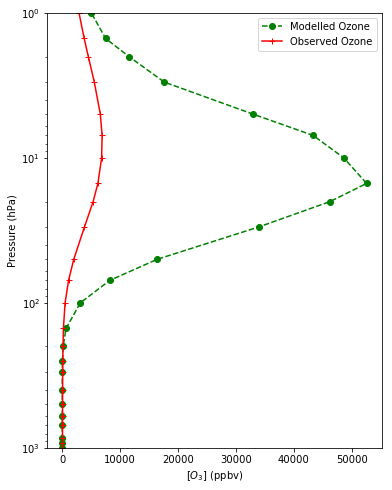

In [26]:
fig5 = plt.figure(figsize=(6, 8))
O3p = fig5.add_subplot(111)

# this will plot both curves on the same graph
# our calculate O3 will be in green and the observations in red
O3p.plot(O3ppbv, Pressure, 'go--', label='Modelled Ozone')
O3p.plot(O3obs, Pressure, 'r+-', label='Observed Ozone')
O3p.legend(loc='upper right')
O3p.set_ylabel('Pressure (hPa)')
O3p.set_xlabel('[$O_3$] (ppbv)')
O3p.set_yscale('log')
O3p.set_ylim((1000, 1))

***
# Q4b. Determine the overhead ozone column depth in Dobson units for both our calculated $O_3$ and the observed $O_3$ (DU) <i>(4 marks)</i>

To calculate the ozone column depth, we need to integrate the total ozone vs altitude. This might be easier to think about if we flip out axis, ie. 

Text(0, 0.5, '[$O_3$] (molecules/$cm^3$)')

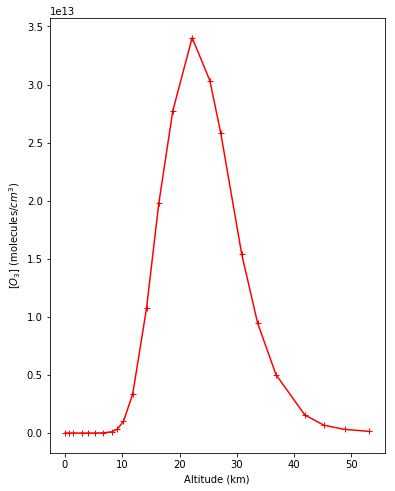

In [27]:
fig6 = plt.figure(figsize=(6, 8))
O3p = fig6.add_subplot(111)
O3p.plot(Altitude, O3, 'r+-', label='Modelled Ozone')
O3p.set_xlabel('Altitude (km)')
O3p.set_ylabel('[$O_3$] (molecules/$cm^3$)')

We want to find the area under the curve above. We can do that with the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a> function, which uses the trapezoidal rule for numerical integration. We'll need to make sure units are appropriate (ie. altitude should be in $cm$ if concentration is in molecules/$cm^3$).

In [28]:
# This gives us the column-depth of modelled ozone in molecules/cm^2
Altitudecm = [Altitude[z]*1e5 for z in range(0,len(Pressure))]
np.trapz(O3, x=Altitudecm)

5.257236157557989e+19

In [29]:
# We need to convert the observed ozone into molecules/cm^3
O3obs_molecpercc = [O3obs[z]*Na[z]/10**9 for z in range(0,len(Pressure))]

# This gives us the column-depth of observed ozone in molecules/cm^2
Altitudecm = [Altitude[z]*1e5 for z in range(0,len(Pressure))]
np.trapz(O3obs_molecpercc, x=Altitudecm)

7.987748588634206e+18

Now we need to convert $molecules/cm^2$ column depths into Dobson units

# Answer to Q4b.

***

If all of the ozone in the ozone layer was brought to the ground, at standard atmospheric pressure (1013.25 hPa or 1 atm) and at 273.15K, the thickness of this layer (in 0.01 mm) is a measure of the total overhead ozone and given in Dobson Units (DU). 

We have a column depth in $molecules/cm^2$ (molecules/area), but to get that into a Dobson unit we need to use the ideal gas law:
\begin{align}
PV= nRT
\end{align}

We can re-write this as,
\begin{align}
P\times(area\times height)= n\times R\times T
\end{align}

We want the "height" (the height of the layer described above), so we can rearrange for it.

\begin{align}
height &= \frac{n\times R\times T}{P\times area} \\
height &= \frac{n}{area}\times \frac{RT}{P}
\end{align}
Now we know the P = 1 atm and T = 273.15 K by definition, so we can see what we need to plug in:

In [30]:
R = 82.05 # cm^3 atm K^-1 mol^ -1
T = 273.15 # K
P = 1 # atm
RToverP = (R*T/P)/Av
print (RToverP)

3.721062178316453e-20


In [31]:
# modelled ozone column is in molecules/cm^2 and RToverP is in cm^3/molecule. Remember that 1 DU is 0.01mm, so we need to convert from cm to 0.01 mm
np.trapz(O3, x=Altitudecm)*(RToverP)*1000

1956.2502628366751

In [32]:
# similarly,
np.trapz(O3obs_molecpercc, x=Altitudecm)*(RToverP)*1000

297.22909163067374

So the overhead ozone column depth for ozone in our <b>model was 1957 DU</b> while it was only <b>297 DU in the observations</b>.

***
# Q4c. Why might modelled ozone be so much greater than the observed ozone concentrations? <i>(4 marks)</i>

# Answer to Q4c.

***

There are several reasons why our Chapman-only model would over-predict stratospheric ozone. The first one being that the Chapman mechanism doesn't contain all of the relevant reactions that occur in the stratosphere. The natural <b>catalytic destruction of ozone by hydrogen oxide radicals ($HO_x$) and nitrogen oxides ($NO_x$) have been neglected</b>. We have also not included <b>catalytic destruction due to chlorine and bromine radicals</b>. Further, while our assumption of $O_x$ steady-state conditions are appropriate in the upper stratosphere where the $O_x$ lifetime is very short compared to other processes, the <b>steady-state assumption is not necessarily appropriate in the lower stratosphere</b> where transport (which our model entirely neglects) is significant for determining ozone concentration.

***
When you have finished your assignment, you need to save it as a PDF and submit that PDF on Quercus. In your Jupyter Notebook, goto File --> Download ad --> PDF via LaTeX (.pdf)
<img src="http://individual.utoronto.ca/sck/CHM210/save2pdf.jpg">

If you have technical questions related to Python or Jupyter, contact Sarah Kavassalis (sarah.kavassalis@mail.utoronto.ca).
